Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(screen plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df
                              

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
%matplotlib inline

In [3]:
wine= pd.read_csv("wine.csv")
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
print(wine.head())
print(wine.info())
print(wine.describe())

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           No

In [5]:
#PCA

In [6]:
Wine= wine.iloc[:,1:]
Wine

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [7]:
Wine.shape

(178, 13)

In [27]:
sc = StandardScaler()

wine = sc.fit_transform(wine)
wine


array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [9]:
pca = PCA() 
pcs = pca.fit_transform(wine)

In [10]:
pd.DataFrame(pcs)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716,0.573876,0.055637,-0.458765,1.065570,-0.420494,0.552928,-0.302978,0.200857
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309,-0.029716,1.010372,0.218806,-0.020182,-0.130020,0.394971,-0.146645,0.126402
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842,0.488305,-0.268957,1.222769,-0.106249,-0.279074,0.001898,0.021278,-0.055752
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616,-0.398364,0.618844,-0.114658,0.107671,0.773866,-0.230929,-0.501277,0.019903
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762,0.447876,0.434937,-0.261548,0.112434,-0.537931,-0.226686,0.274109,-0.517498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155,0.843455,-0.206626,-0.125419,-0.392619,0.136783,0.174807,-0.198803,0.093951
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465,0.139947,-0.565588,0.055341,-0.236267,0.254286,-0.277519,-0.185064,-0.024277
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290,0.733026,0.052545,-0.027881,-0.212749,0.502640,0.693336,0.167036,-0.031696
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562,0.755423,0.426512,0.048784,0.479793,0.313786,0.344120,-0.109515,0.102823


In [11]:
pca.explained_variance_ratio_ #amount of info

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

In [12]:
 np.cumsum(pca.explained_variance_ratio_) 

array([0.39542486, 0.57378745, 0.67707846, 0.74335831, 0.80603706,
       0.85409266, 0.89364973, 0.91865217, 0.93969088, 0.95842703,
       0.97455906, 0.98661596, 0.99587055, 1.        ])

Text(0.5, 1.0, 'Scree Plot')

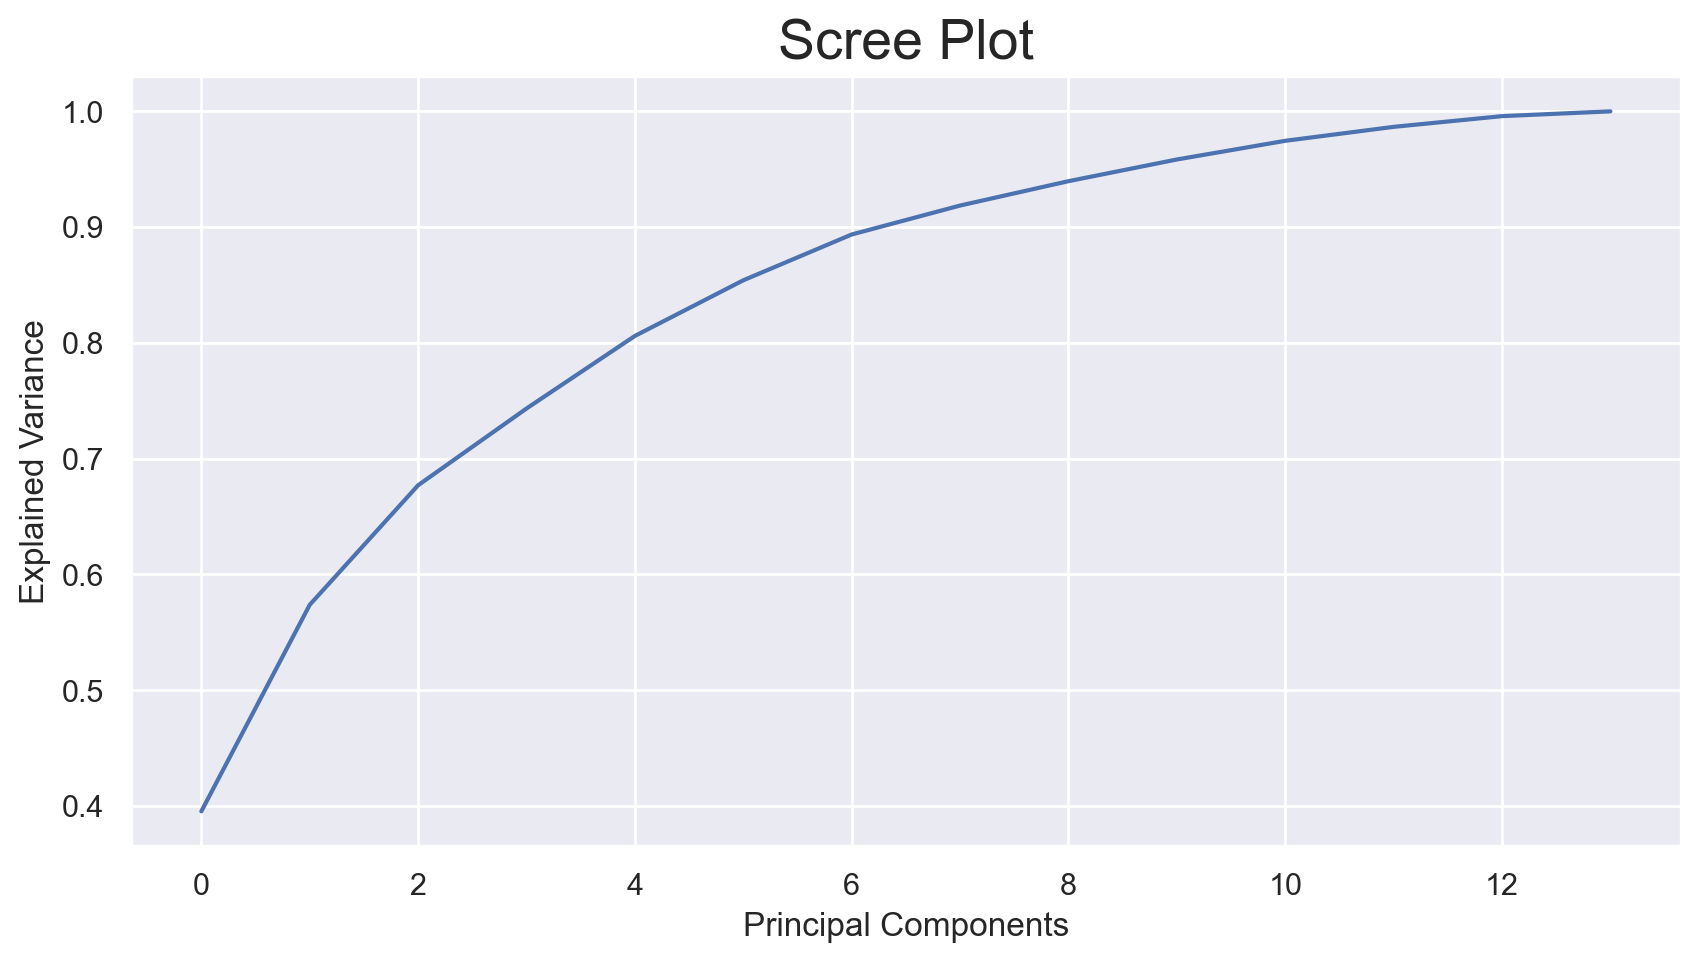

In [13]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
#plt.plot gives line plot
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot', size = 20)

In [14]:
pca = PCA(n_components=3) 
pcs = pca.fit_transform(wine)
pcs

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01],
       [-3.92258841e+00, -2.76821026e+00, -1.74968168e-01],
       [-1.40751111e+00, -8.67773087e-01,  2.02582949e+00],
       [-3.28812981e+00, -2.13017513e+00, -6.28992339e-01],
       [-2.75057754e+00, -1.17916999e+00, -9.77337471e-01],
       [-2.39286652e+00, -1.61128232e+00,  1.45729462e-01],
       [-2.79525633e+00, -9.23179517e-01, -1.77092548e+00],
       [-3.00559666e+00, -7.96284169e-01, -9.83741629e-01],
       [-3.67868855e+00, -1.31252342e+00, -4.21854170e-01],
       [-2.10963477e+00, -6.12981986e-01, -1.19156995e+00],
       [-2.43845636e+00, -6.78523310e-01, -8.65513701e-01],
       [-3.67349453e+00, -1.14012136e+00, -1.20376870e+00],
       [-4.44157575e+00, -2.11031917e+00, -1.26245041e+00],
       [-2.60892387e+00, -1.66641801e+00,  2.17632760e-01],
       [-2.47542846e+00, -2.33089672e+00

In [15]:
data = pd.DataFrame(pcs,columns=['PC1','PC2','PC3'])
data

,PC1,PC2,PC3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829
...,...,...,...
173,3.627996,-2.206617,-0.343668
174,2.942729,-1.752263,0.207480
175,3.027272,-2.756040,-0.940803
176,2.755222,-2.293784,-0.550474


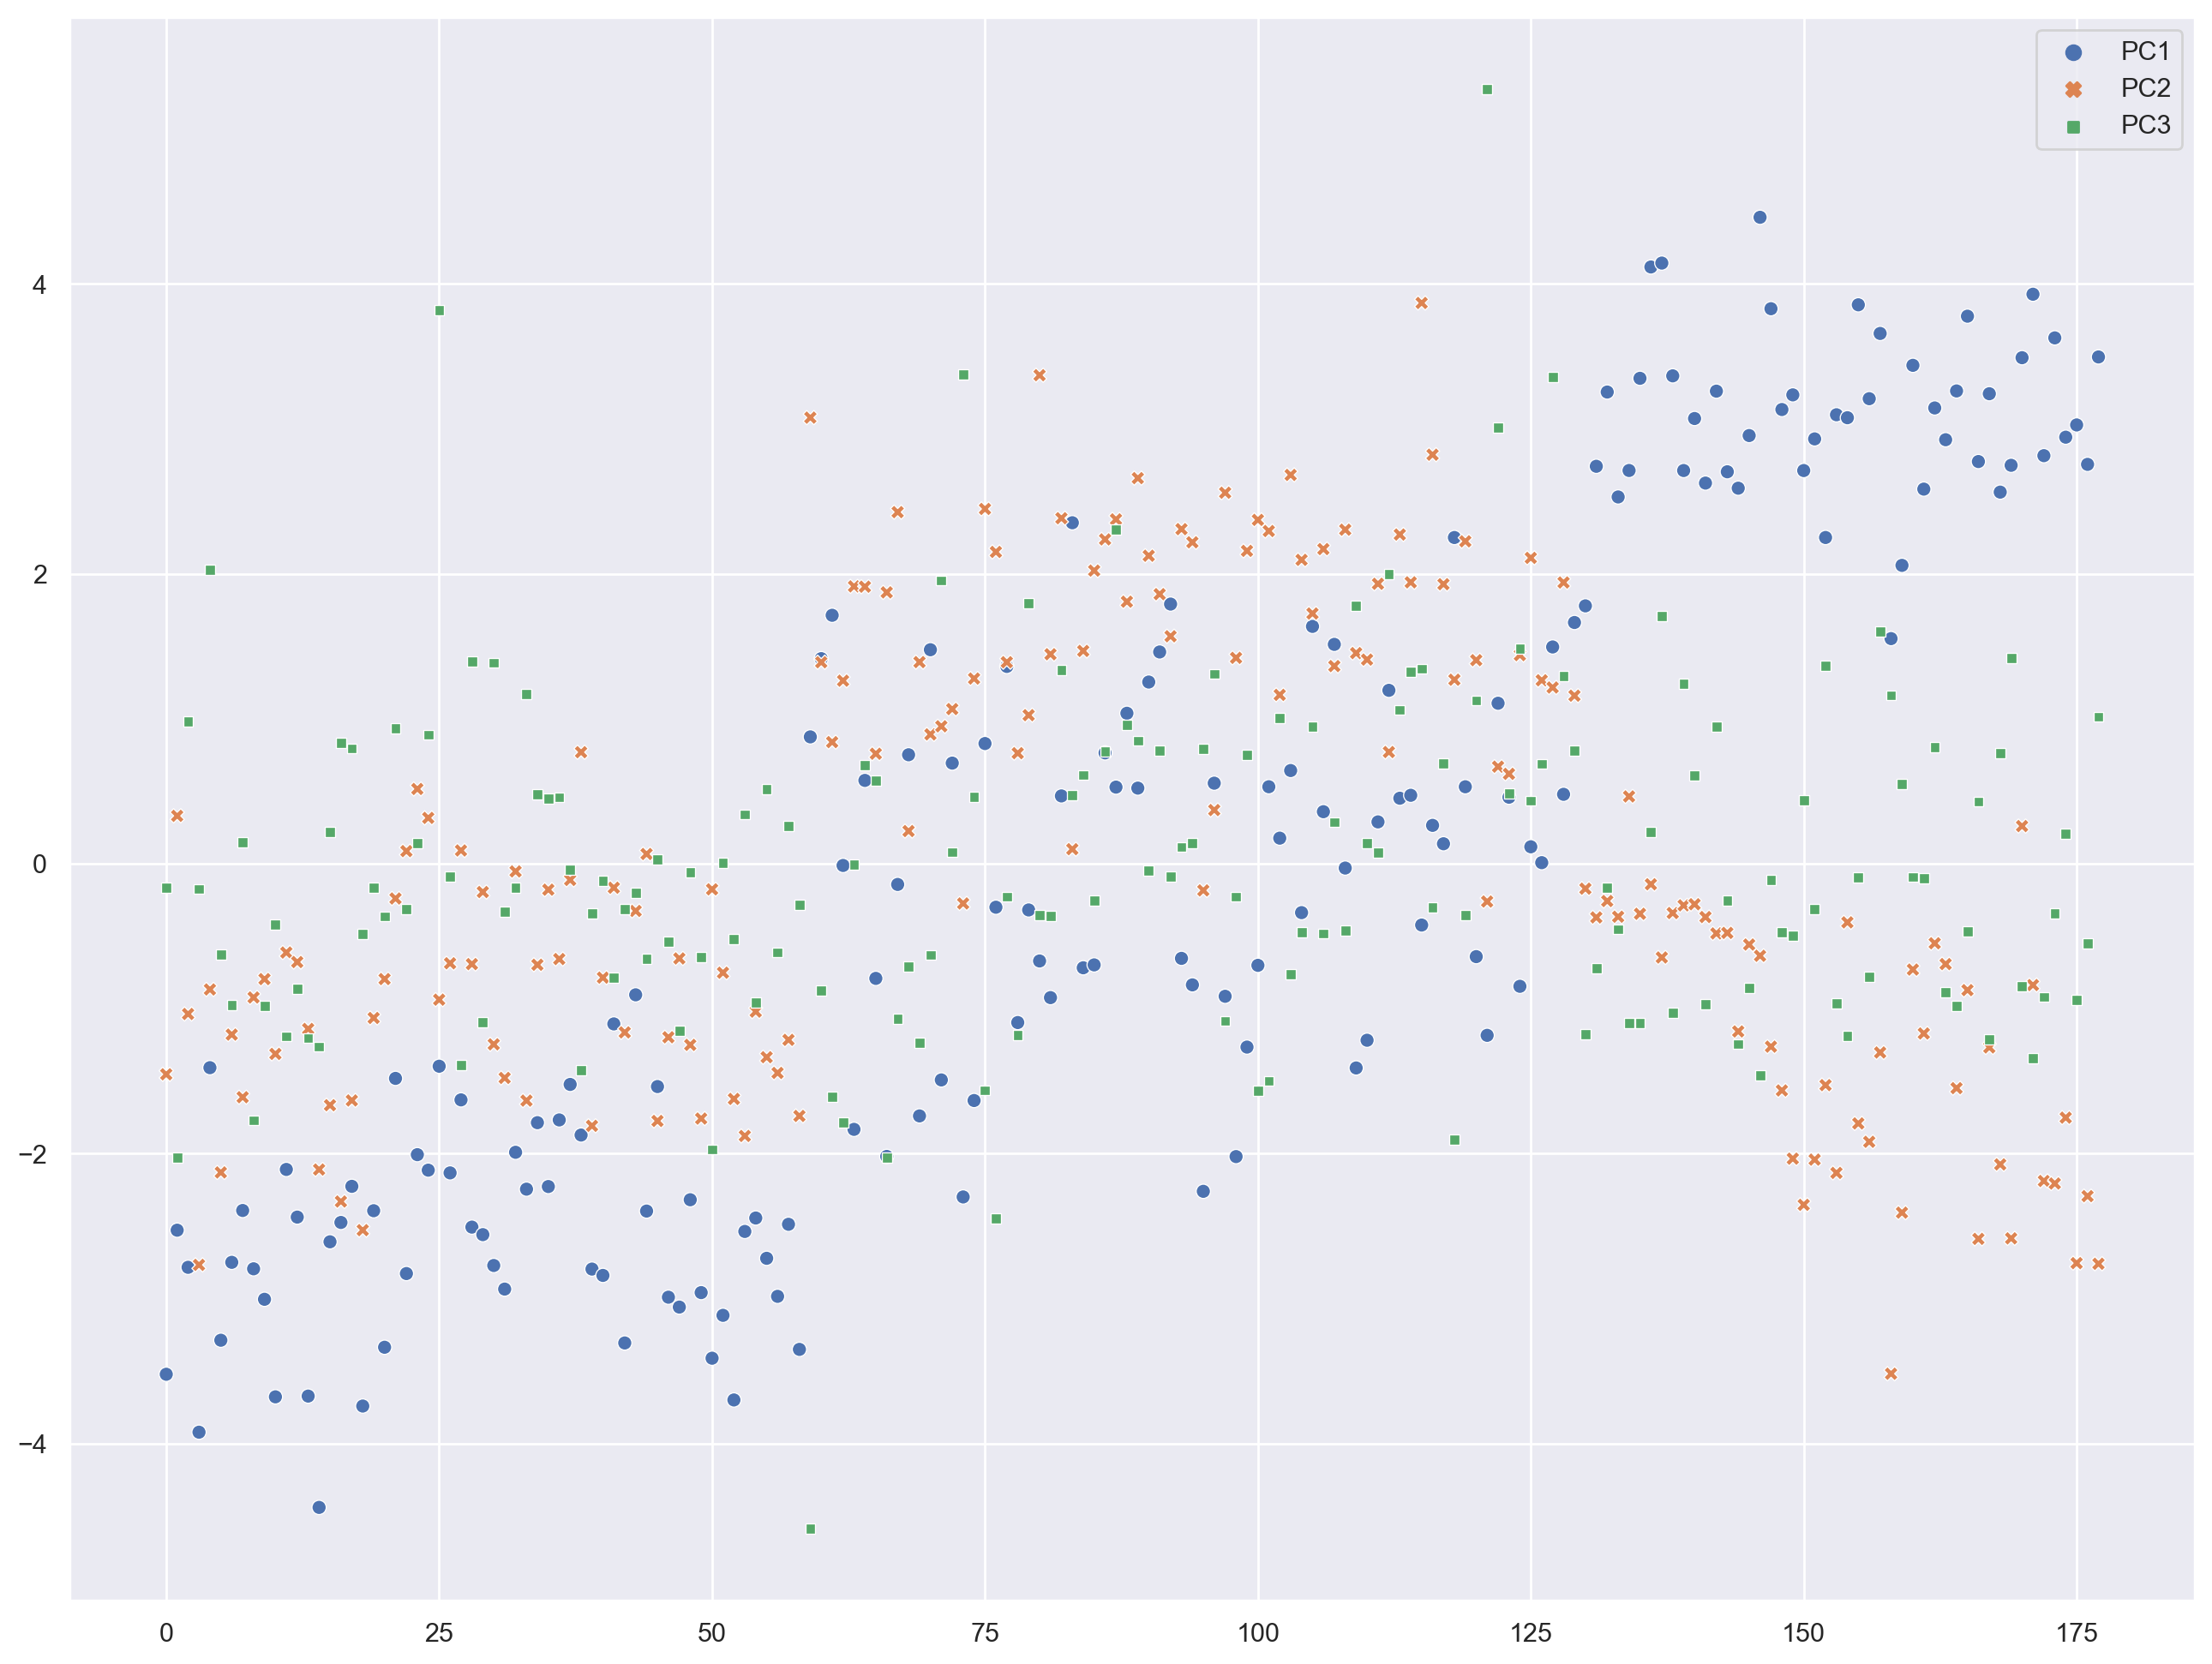

In [16]:
# Visualization of PCAs
import seaborn as sns
fig=plt.figure(figsize=(16,12))
sns.scatterplot(data=data);

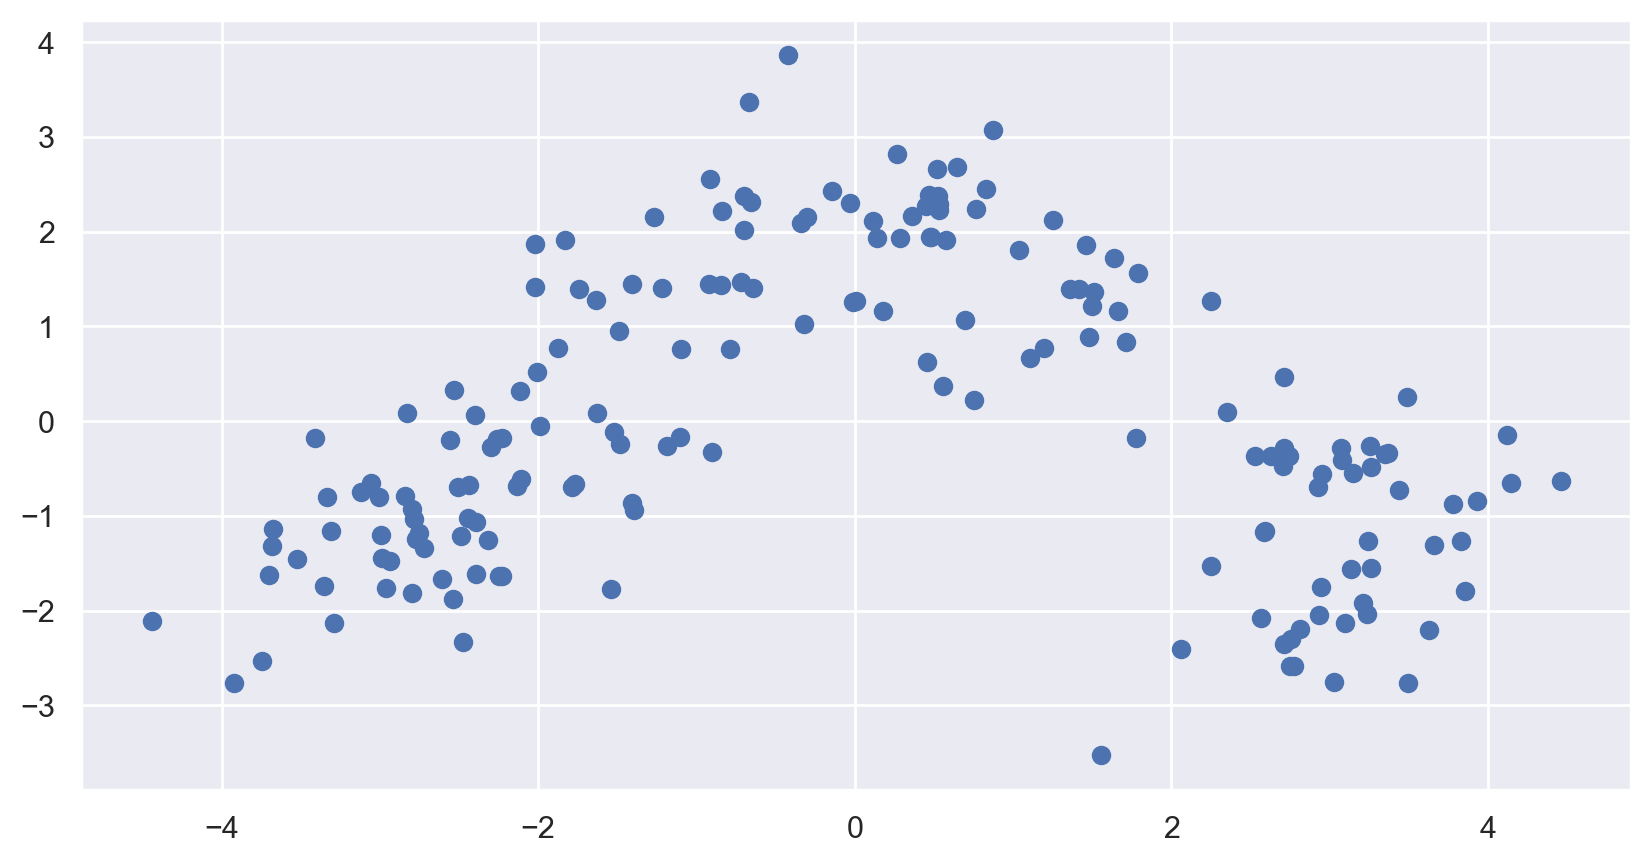

In [20]:
x= data.iloc[:, 0:1]
y= data.iloc[:, 1:2]
plt.scatter(x,y,);



In [24]:
#Heirachal clustering

In [49]:
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

In [50]:
df = pd.read_csv("wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [52]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [53]:
pd.DataFrame(x, columns= df.columns)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,1.373864,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,1.373864,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


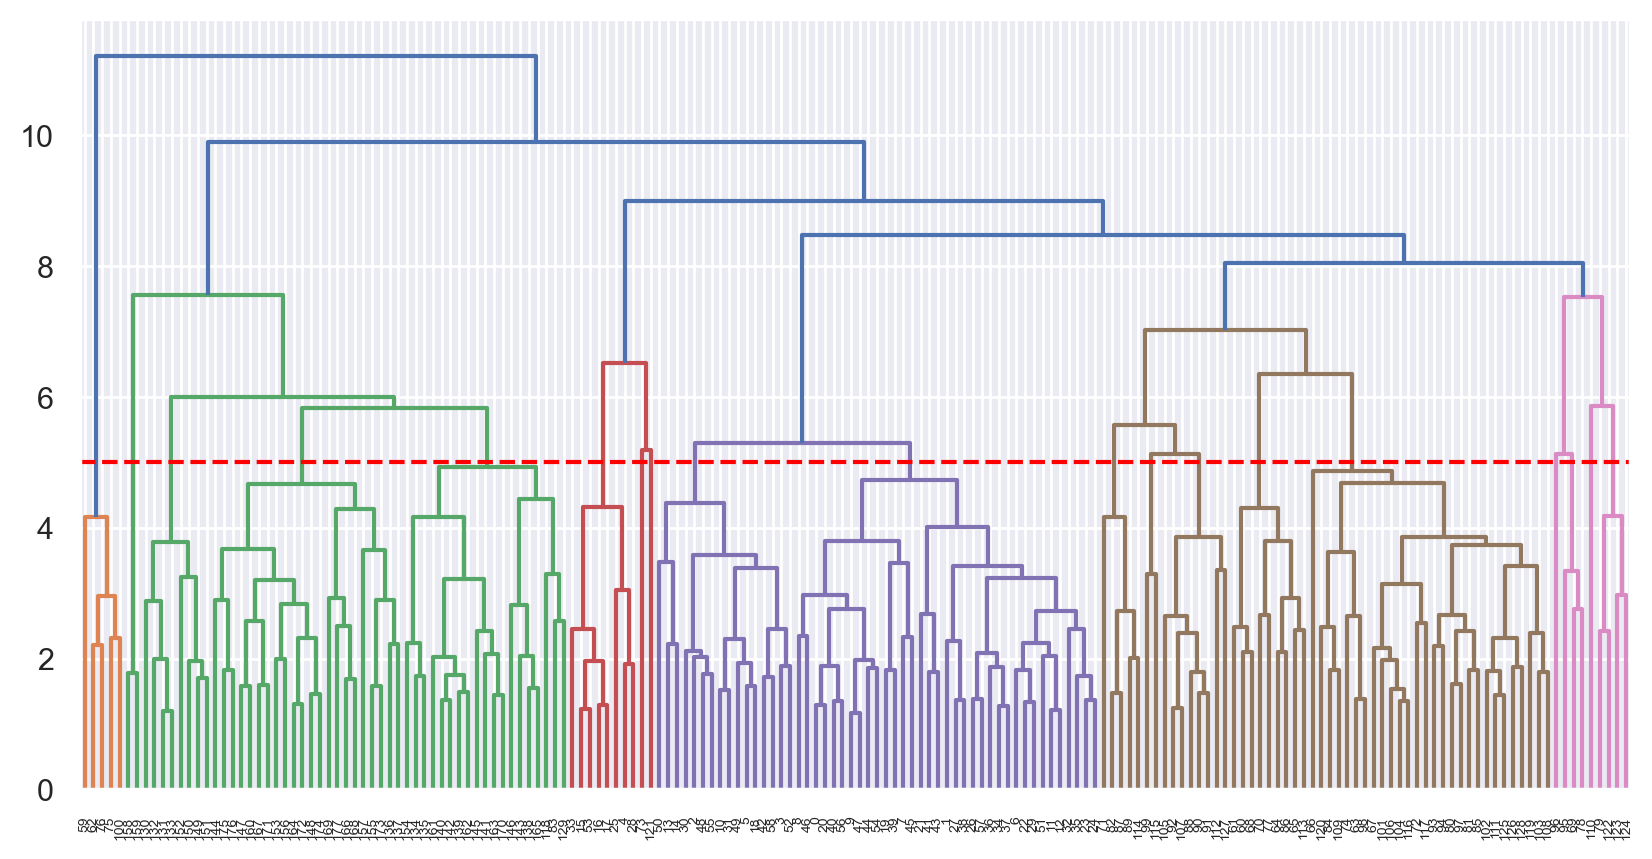

In [54]:
lk = hierarchy.linkage(x, method='complete') 
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 5, linestyle = '--', color = 'red')

In [55]:
hclusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [56]:
y=pd.DataFrame(hclusters.fit_predict(df),columns=['clusters'])
y['clusters'].value_counts()

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


1    72
2    58
0    48
Name: clusters, dtype: int64

In [57]:
df['clusters']=hclusters.labels_
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [58]:
df.groupby('clusters').agg(['mean']).reset_index()

,clusters,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.041667,13.776667,1.875833,2.421458,17.064583,106.687500,2.859583,2.998750,0.286042,1.938958,5.637917,1.080000,3.103958,1189.770833
1,1,2.291667,12.514444,2.515833,2.304028,20.823611,92.736111,2.053750,1.736944,0.391944,1.428056,4.102778,0.940556,2.471667,464.236111
2,2,2.241379,12.961897,2.494655,2.398621,19.856897,102.689655,2.127586,1.589828,0.387241,1.505000,5.764138,0.877000,2.378103,731.258621


In [59]:
df.groupby('clusters').agg('mean')

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clusters,,,,,,,,,,,,,,
0,1.041667,13.776667,1.875833,2.421458,17.064583,106.687500,2.859583,2.998750,0.286042,1.938958,5.637917,1.080000,3.103958,1189.770833
1,2.291667,12.514444,2.515833,2.304028,20.823611,92.736111,2.053750,1.736944,0.391944,1.428056,4.102778,0.940556,2.471667,464.236111
2,2.241379,12.961897,2.494655,2.398621,19.856897,102.689655,2.127586,1.589828,0.387241,1.505000,5.764138,0.877000,2.378103,731.258621


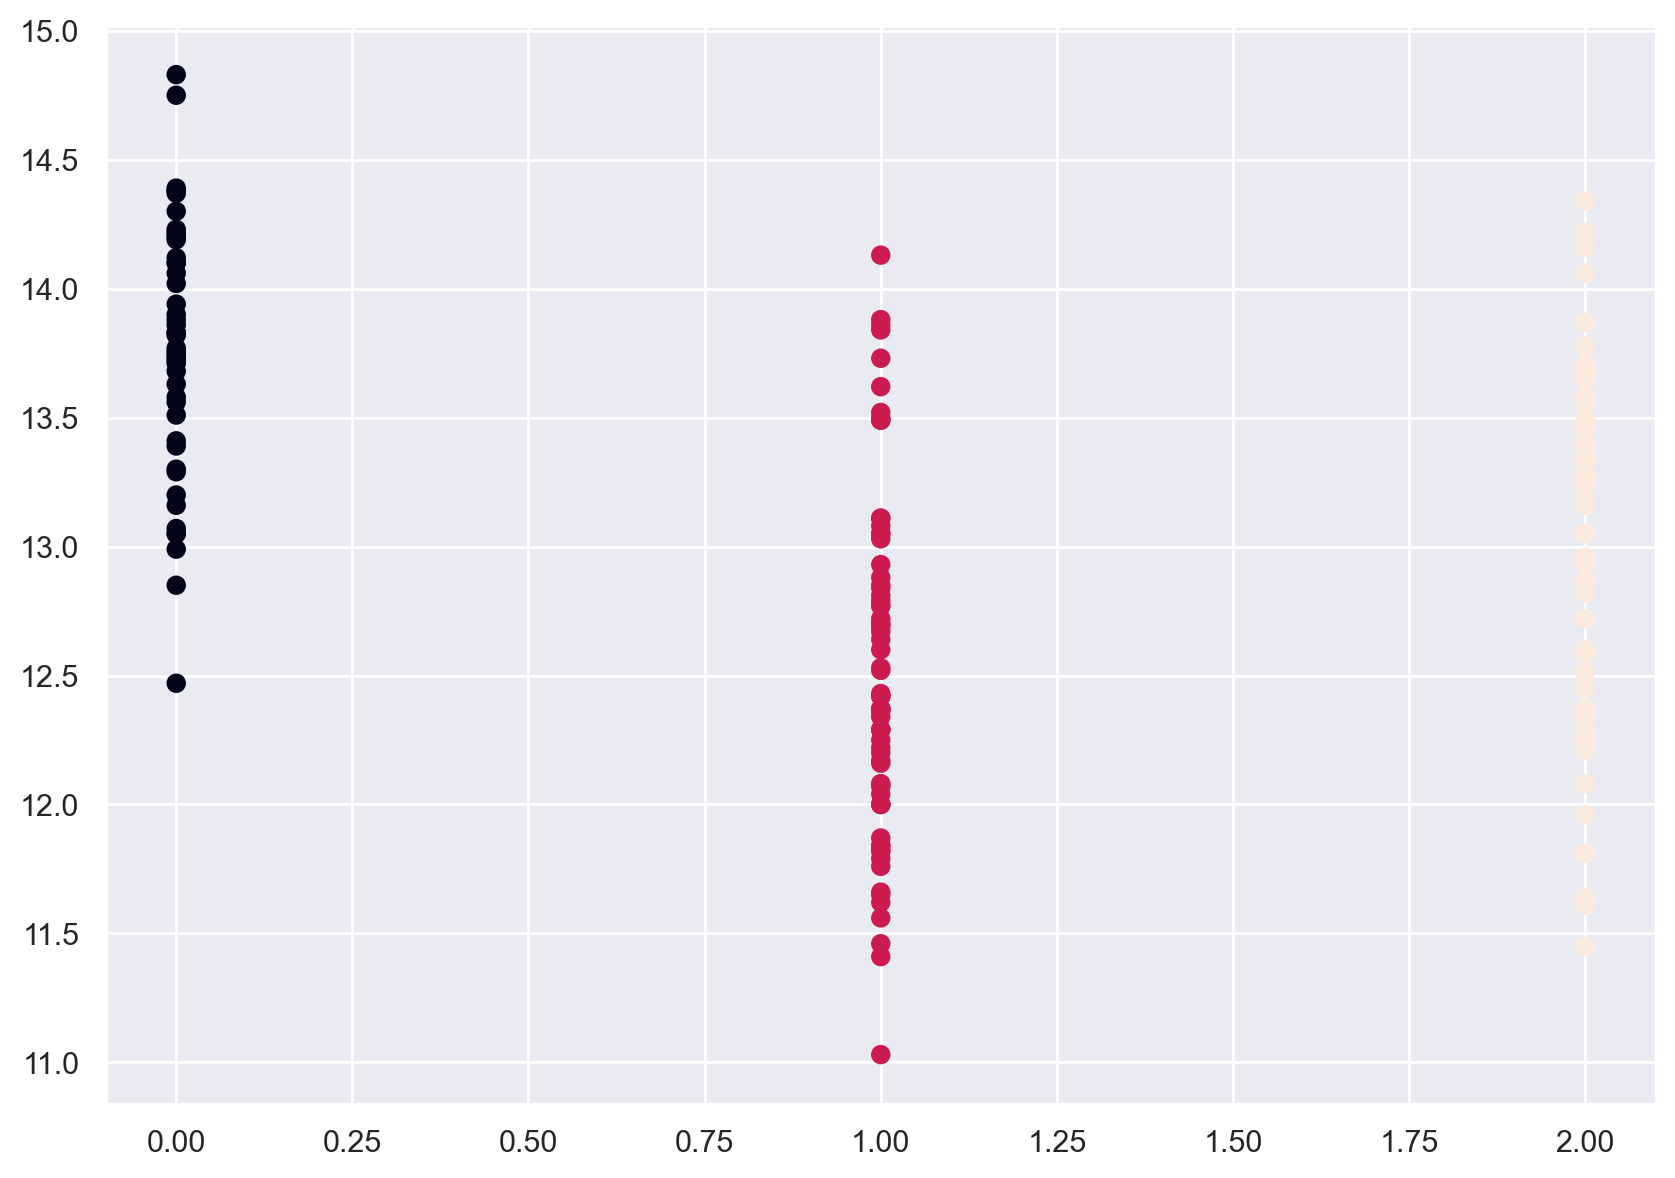

In [61]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['clusters'],df['Alcohol'], c=hclusters.labels_) 

In [62]:
#K-means

In [63]:
from sklearn.cluster import KMeans

In [65]:
km = KMeans() 
yp = km.fit_predict(x) 
yp

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([7, 5, 7, 7, 1, 7, 7, 5, 7, 7, 7, 5, 7, 7, 7, 7, 1, 1, 7, 5, 7, 5,
       5, 5, 5, 1, 5, 5, 1, 5, 1, 7, 5, 1, 5, 5, 5, 5, 5, 5, 7, 5, 7, 5,
       5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 6, 3, 3, 6, 6, 3, 3,
       6, 6, 3, 6, 3, 1, 6, 1, 6, 6, 6, 3, 6, 0, 6, 6, 3, 4, 0, 6, 3, 3,
       3, 3, 3, 3, 3, 0, 6, 1, 3, 6, 6, 0, 6, 6, 0, 6, 6, 3, 6, 3, 6, 0,
       0, 0, 3, 3, 3, 3, 6, 6, 4, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 2, 4, 4, 2,
       2, 2], dtype=int32)

In [66]:
km.cluster_centers_

array([[ 0.07996036, -1.03620606,  0.58095062, -0.18508636,  0.42545005,
        -0.60138446,  0.43197821,  0.45015598, -0.21875372,  0.7580051 ,
        -1.07220175, -0.24688857,  0.6598059 , -0.94545472],
       [-0.7434331 ,  0.41024298, -0.48064406,  1.42834593,  0.96789   ,
         1.44156093,  0.98525386,  1.06311257, -0.01493863,  0.70085155,
        -0.15765165,  0.91258886,  0.60496989,  0.57644379],
       [ 1.37386437,  0.58951682,  0.63420694,  0.7046359 ,  0.9238222 ,
         0.53972984, -0.7143621 , -1.00538485,  0.4052184 , -0.08667614,
         2.05769653, -1.49617405, -1.42390333, -0.35859802],
       [ 0.07996036, -1.10820526, -0.61025526,  0.1827849 ,  0.46500165,
        -0.45503184, -0.60871769, -0.36811541,  0.89944719, -0.44111949,
        -0.88161651,  0.67234305, -0.220388  , -0.65788109],
       [ 1.30198081,  0.01673622,  1.01240097,  0.02593193,  0.40606891,
        -0.31731872, -1.09733206, -1.31334765,  0.83336929, -1.02362398,
         0.52531735, -1.07

In [67]:
km.inertia_

960.5827518555643

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'au

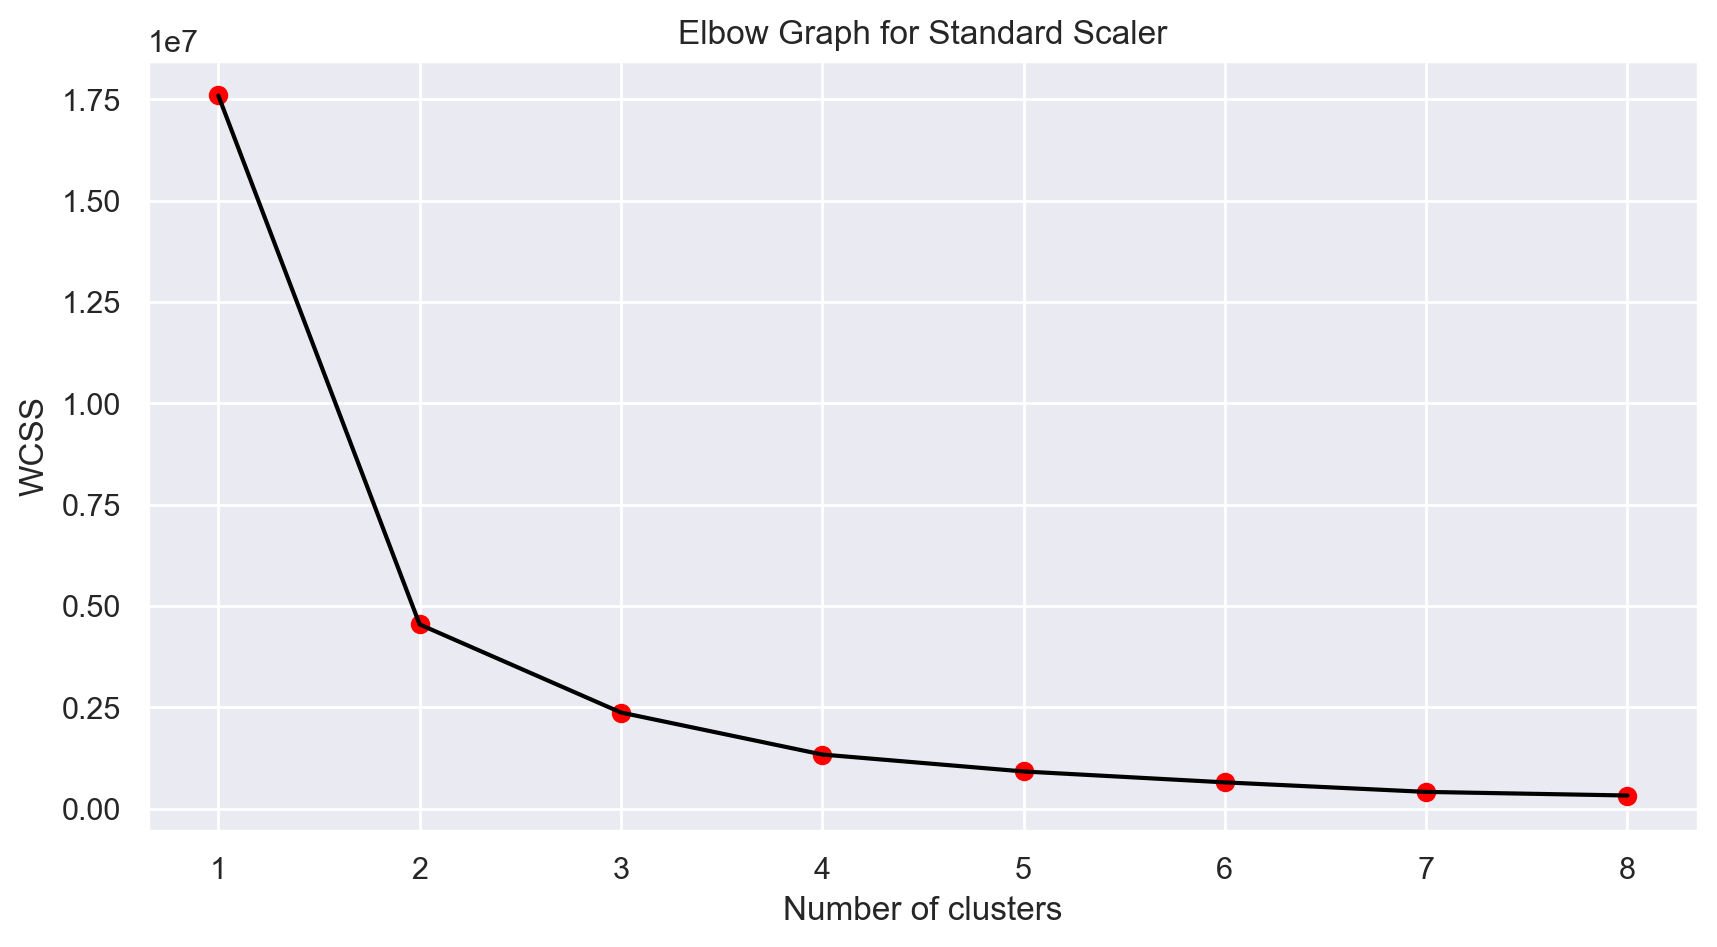

In [68]:
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [69]:
km = KMeans(n_clusters=2) 
ypred = km.fit_predict(x) 
ypred

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [70]:
from sklearn.metrics import silhouette_score

In [71]:
silhouette_score(x,ypred)

0.2861665011841207

In [72]:
df['cluster'] = ypred  
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters,cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2,0


In [73]:
df.groupby('cluster').agg('mean') 

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters
cluster,,,,,,,,,,,,,,,
0,2.738462,12.941538,3.076615,2.418462,21.215385,97.538462,1.706154,0.986769,0.465846,1.182154,6.314462,0.756400,1.854615,604.584615,1.476923
1,1.477876,13.034602,1.910531,2.336637,18.505310,101.008850,2.633894,2.628938,0.302035,1.826018,4.335398,1.073097,3.047168,828.752212,0.814159


In [ ]:
#It appears that the clusters have been formed based on the Proline feature, 
#with 0 representing the cluster with the lowest Proline values and 
#1 representing the cluster with the highest Proline values.